In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
pip install nltk

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('sentiment_tweets3.csv')
print(df.shape)
df1= df.head(500)
print(df.shape)

(10314, 3)
(10314, 3)


In [5]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


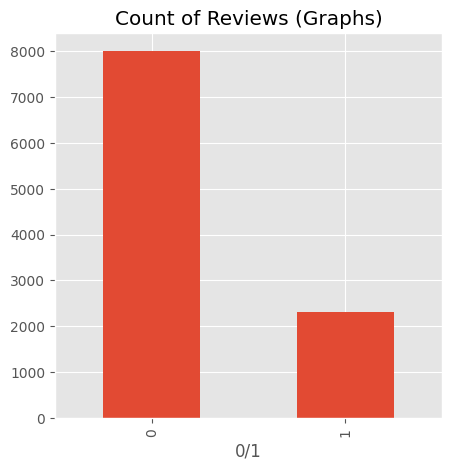

In [6]:
ax = df['label (depression result)'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews (Graphs)',
          figsize=(5, 5))
ax.set_xlabel('0/1')
plt.show()

In [8]:
example = df1['message to examine'][250]
print(example)

I'VE FINISHED THE 'EAT ME, DRINK ME' BADGES!!!! ----&gt; http://twitpic.com/3l3i1 &lt;---- Look here 


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', "'VE", 'FINISHED', 'THE', "'EAT", 'ME', ',', 'DRINK', 'ME', "'"]

In [10]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ("'VE", 'MD'),
 ('FINISHED', 'VB'),
 ('THE', 'NNP'),
 ("'EAT", 'NNPS'),
 ('ME', 'NNP'),
 (',', ','),
 ('DRINK', 'NNP'),
 ('ME', 'NNP'),
 ("'", 'POS')]

In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  I/PRP
  'VE/MD
  FINISHED/VB
  (ORGANIZATION THE/NNP 'EAT/NNPS)
  ME/NNP
  ,/,
  (ORGANIZATION DRINK/NNP)
  ME/NNP
  '/POS
  (ORGANIZATION BADGES/NNP)
  !/.
  !/.
  !/.
  !/.
  --/:
  --/:
  &/CC
  gt/NN
  ;/:
  http/NN
  :/:
  //twitpic.com/3l3i1/NN
  &/CC
  lt/NN
  ;/:
  --/:
  --/:
  Look/VBP
  here/RB)


In [13]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['message to examine']
    myid = row['Index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10314 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Index'})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head()

,Index,neg,neu,pos,compound,message to examine,label (depression result)
0,106,0.0,0.734,0.266,0.4404,just had a real good moment. i missssssssss hi...,0
1,217,0.0,1.000,0.000,0.0000,is reading manga http://plurk.com/p/mzp1e,0
2,220,0.0,1.000,0.000,0.0000,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,0.0,0.873,0.127,0.4404,@lapcat Need to send 'em to my accountant tomo...,0
4,540,0.0,1.000,0.000,0.0000,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [20]:
column_to_drop = 'Index'
vaders.drop(columns=[column_to_drop], inplace=True)

In [21]:
vaders.head()

,neg,neu,pos,compound,message to examine,label (depression result)
0,0.0,0.734,0.266,0.4404,just had a real good moment. i missssssssss hi...,0
1,0.0,1.000,0.000,0.0000,is reading manga http://plurk.com/p/mzp1e,0
2,0.0,1.000,0.000,0.0000,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,0.0,0.873,0.127,0.4404,@lapcat Need to send 'em to my accountant tomo...,0
4,0.0,1.000,0.000,0.0000,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


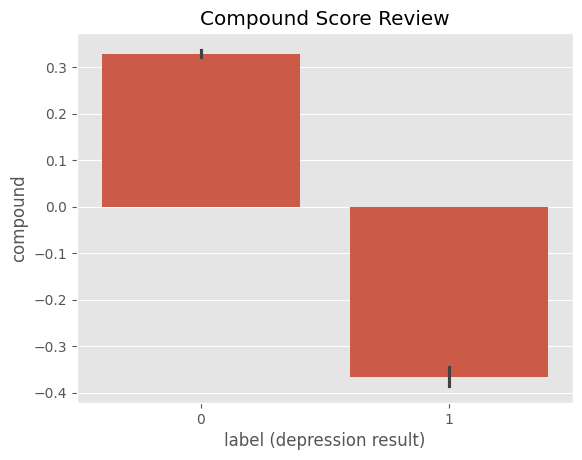

In [22]:
ax = sns.barplot(data=vaders,x='label (depression result)', y='compound')
ax.set_title('Compound Score Review')
plt.show()

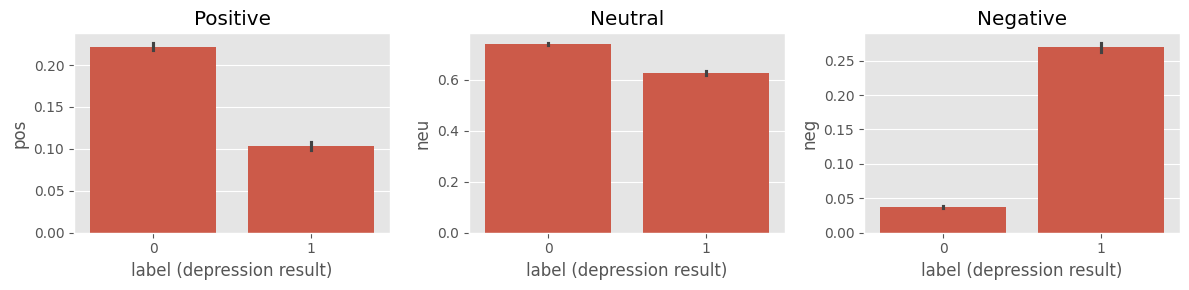

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='label (depression result)', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='label (depression result)', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='label (depression result)', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
pip install transformers


In [26]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [27]:
pip install tensorflow


In [28]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from scipy.special import softmax


In [29]:
label_0_data = df[df['label (depression result)'] == 0]
print(label_0_data)

       Index                                 message to examine  \
0        106  just had a real good moment. i missssssssss hi...   
1        217         is reading manga  http://plurk.com/p/mzp1e   
2        220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3        288  @lapcat Need to send 'em to my accountant tomo...   
4        540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...      ...                                                ...   
7995  799410   &quot;Wow, What A Tight Fit&quot; Lmao, Shutup.    
7996  799680  @theokk don't know what you could possibly mea...   
7997  799746  @shwood loved the cameo, made me chuckle! alon...   
7998  799826  lol. i just realized my room has a color theme...   
7999  799992                  ReCoVeRiNg FrOm ThE lOnG wEeKeNd    

      label (depression result)  
0                             0  
1                             0  
2                             0  
3                             0  
4                        

In [30]:
label_1_data = df[df['label (depression result)'] == 1]
print(label_1_data)

        Index                                 message to examine  \
8000   800000  The lack of this understanding is a small but ...   
8001   800001  i just told my parents about my depression and...   
8002   800002  depression is something i don't speak about ev...   
8003   800003  Made myself a tortilla filled with pb&j. My de...   
8004   800004  @WorldofOutlaws I am gonna need depression med...   
...       ...                                                ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   
10313  802313                                                  0   

       label (depression result)  
8000                           1  
8001                           1  
8002                           1  
8003                           1  
8004    

In [31]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [32]:
print(example)
sia.polarity_scores(example)

I'VE FINISHED THE 'EAT ME, DRINK ME' BADGES!!!! ----&gt; http://twitpic.com/3l3i1 &lt;---- Look here 


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [35]:
example2 = df['message to examine'][9000]
print(example2)
sia.polarity_scores(example2)

Anxiety so real and depression too <Emoji: Face with cold sweat>


{'neg': 0.386, 'neu': 0.614, 'pos': 0.0, 'compound': -0.6872}

In [37]:
import tensorflow as tf

In [38]:
encoded_text = tokenizer(example, return_tensors='tf')

output = model(encoded_text)

logits = output.logits

scores = tf.nn.softmax(logits, axis=-1)

scores_array = scores.numpy()

scores_dict = {
    'roberta_neg': scores_array[0][0],
    'roberta_neu': scores_array[0][1],
    'roberta_pos': scores_array[0][2]
}

print(scores_dict)

{'roberta_neg': 0.02111436, 'roberta_neu': 0.340227, 'roberta_pos': 0.63865864}


In [39]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [ ]:
def polarity_scores_roberta(example, tokenizer, model):
    encoded_text = tokenizer(example, return_tensors='tf')
    output = model(encoded_text)
    logits = output.logits
    scores = tf.nn.softmax(logits, axis=-1)
    scores_array = scores.numpy()
    scores_dict = {
        'roberta_neg': scores_array[0][0],
        'roberta_neu': scores_array[0][1],
        'roberta_pos': scores_array[0][2]
    }
    
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['message to examine']
        myid = row['Index']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text, tokenizer, model)  # Pass tokenizer and model objects
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = TFAutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
roberta_result = polarity_scores_roberta(text, tokenizer, model

In [87]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Index'})
results_df = results_df.merge(df, how='left')

In [88]:
results_df

,Index,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,message to examine,label (depression result)
0,106,0.000,0.734,0.266,0.4404,0.006051,0.026728,0.967220,just had a real good moment. i missssssssss hi...,0
1,217,0.000,1.000,0.000,0.0000,0.035051,0.870904,0.094045,is reading manga http://plurk.com/p/mzp1e,0
2,220,0.000,1.000,0.000,0.0000,0.099413,0.828831,0.071756,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,0.000,0.873,0.127,0.4404,0.348700,0.553467,0.097833,@lapcat Need to send 'em to my accountant tomo...,0
4,540,0.000,1.000,0.000,0.0000,0.021000,0.559128,0.419871,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...,...,...,...,...,...,...,...
10309,802309,0.344,0.656,0.000,-0.8126,0.548753,0.349455,0.101792,No Depression by G Herbo is my mood from now o...,1
10310,802310,0.167,0.721,0.113,-0.2960,0.890637,0.103604,0.005759,What do you do when depression succumbs the br...,1
10311,802311,0.469,0.400,0.131,-0.7845,0.050138,0.676953,0.272909,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,0.244,0.396,0.361,0.1950,0.477412,0.395112,0.127475,dont mistake a bad day with depression! everyo...,1


In [90]:
results_df.columns

Index(['Index', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'message to examine',
       'label (depression result)'],
      dtype='object')

In [89]:
sia.polarity_scores('suryansh is a good person and he always used to help the person around him')

{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6808}

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


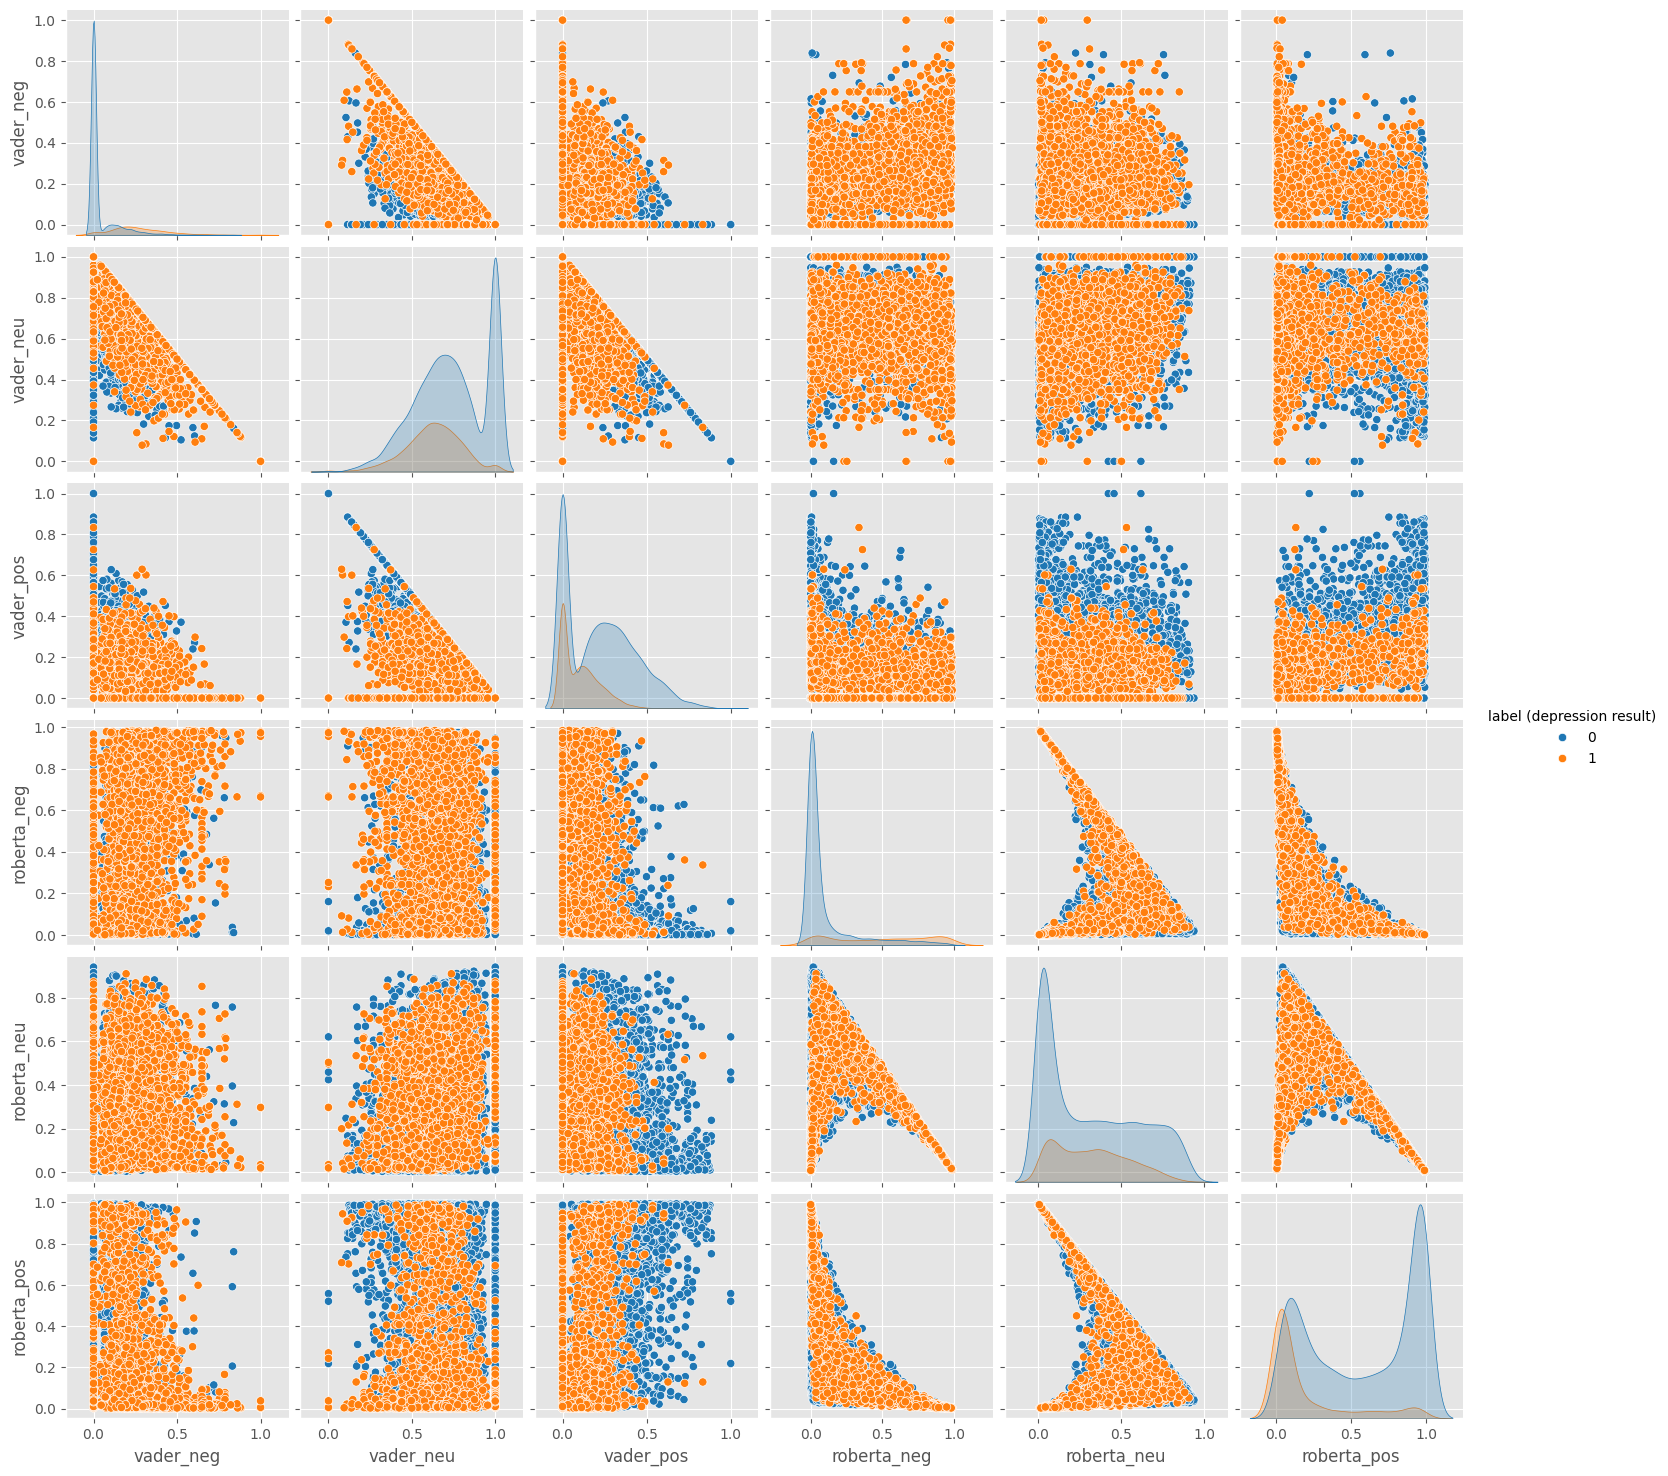

In [92]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='label (depression result)',
            palette='tab10')
plt.show()


In [102]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [104]:
sent_pipeline('aman is a very good guy')

[{'label': 'POSITIVE', 'score': 0.9998555183410645}]

In [105]:
sent_pipeline("suryansh is arrogant")

[{'label': 'NEGATIVE', 'score': 0.998848557472229}]

In [106]:
sent_pipeline('mohit is stupid ')

[{'label': 'NEGATIVE', 'score': 0.9997653365135193}]

In [111]:
sent_pipeline('nitin is dumb')

[{'label': 'NEGATIVE', 'score': 0.999703586101532}]